# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Titel eurer Arbeit"
### 1.2 Fragestellung:
- "Eure Fragestellung"   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [22]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
import sys
!{sys.executable} -m pip install pandas

In [46]:
import pandas as pd 
df = pd.read_csv('share-of-adults-defined-as-obese.csv', skiprows=1, 
                 names=['Gebiet', 'Jahr', 'Fettleibigkeit'])
print(df_pivot.head())

Jahr            1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
Gebiet                                                                       
Afghanistan      0.4   0.4   0.5   0.5   0.5   0.6   0.6   0.6   0.7   0.7   
Africa (WHO)     1.7   1.8   1.9   1.9   2.0   2.1   2.2   2.3   2.4   2.5   
Albania          5.7   5.8   6.0   6.1   6.3   6.4   6.6   6.8   7.0   7.2   
Algeria          5.9   6.1   6.2   6.4   6.7   6.9   7.2   7.4   7.8   8.1   
Americas (WHO)   9.0   9.3   9.5   9.8  10.1  10.4  10.7  11.1  11.4  11.8   

Jahr            ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Gebiet          ...                                                         
Afghanistan     ...   2.8   2.9   3.1   3.3   3.5   3.7   3.9   4.1   4.3   
Africa (WHO)    ...   6.6   6.8   7.1   7.4   7.6   7.9   8.2   8.5   8.8   
Albania         ...  16.9  17.5  18.1  18.7  19.3  19.9  20.5  21.1  21.7   
Algeria         ...  19.2  19.9  20.7  21.4  22.2  23.1  23.9  24.8 

In [47]:
print(df.columns)


Index(['Gebiet', 'Jahr', 'Fettleibigkeit'], dtype='object')


In [48]:
df.columns = df.columns.str.strip()  # Entfernt Leerzeichen am Anfang/Ende
print(df.columns)  # Überprüfe erneut die Spaltennamen


Index(['Gebiet', 'Jahr', 'Fettleibigkeit'], dtype='object')


In [49]:
print(df.head())


            Gebiet  Jahr  Fettleibigkeit
Afghanistan    AFG  1975             0.4
Afghanistan    AFG  1976             0.4
Afghanistan    AFG  1977             0.5
Afghanistan    AFG  1978             0.5
Afghanistan    AFG  1979             0.5


In [50]:
print(list(df.columns))


['Gebiet', 'Jahr', 'Fettleibigkeit']


In [56]:
duplicates = df[df.duplicated(subset=['Gebiet', 'Jahr'], keep=False)]
print(duplicates)


                      Gebiet  Jahr  Fettleibigkeit
Africa (WHO)             NaN  1975             1.7
Africa (WHO)             NaN  1976             1.8
Africa (WHO)             NaN  1977             1.9
Africa (WHO)             NaN  1978             1.9
Africa (WHO)             NaN  1979             2.0
...                      ...   ...             ...
Western Pacific (WHO)    NaN  2012             5.3
Western Pacific (WHO)    NaN  2013             5.7
Western Pacific (WHO)    NaN  2014             6.0
Western Pacific (WHO)    NaN  2015             6.4
Western Pacific (WHO)    NaN  2016             6.7

[294 rows x 3 columns]


In [57]:
df_aggregated = df.groupby(['Gebiet', 'Jahr'], as_index=False).mean()


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [59]:
df_pivot = df_aggregated.pivot(index='Gebiet', columns='Jahr', values='Fettleibigkeit')
print(df_pivot.head())

Jahr    1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  ...  2007  \
Gebiet                                                              ...         
AFG      0.4   0.4   0.5   0.5   0.5   0.6   0.6   0.6   0.7   0.7  ...   2.8   
AGO      0.7   0.8   0.8   0.8   0.9   0.9   1.0   1.1   1.1   1.2  ...   4.3   
ALB      5.7   5.8   6.0   6.1   6.3   6.4   6.6   6.8   7.0   7.2  ...  16.9   
AND     13.4  14.0  14.5  15.0  15.6  16.0  16.5  17.0  17.4  17.9  ...  25.1   
ARE     10.8  10.9  10.9  11.1  11.3  11.7  12.1  12.6  13.2  13.7  ...  21.5   

Jahr    2008  2009  2010  2011  2012  2013  2014  2015  2016  
Gebiet                                                        
AFG      2.9   3.1   3.3   3.5   3.7   3.9   4.1   4.3   4.5  
AGO      4.6   4.8   5.1   5.3   5.6   5.9   6.2   6.5   6.8  
ALB     17.5  18.1  18.7  19.3  19.9  20.5  21.1  21.7  22.3  
AND     25.4  25.7  26.0  26.3  26.6  27.0  27.3  27.7  28.0  
ARE     21.5  21.8  22.5  23.4  24.5  25.8  27.2  28.6

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [5]:
df.dtypes

Gebiet         object
Code           object
Jahr            int64
Percentage    float64
dtype: object

### 3.1 Analyse Gebiete

In [6]:
print("Anzahl verschiedener Gebiete: ", len(df["Gebiet"].unique()))

Anzahl verschiedener Gebiete:  197


In [7]:
# Anzahl Datenpunkte pro Gebiet
df["Gebiet"].value_counts()

Gebiet
Afghanistan    42
Nepal          42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Gambia         42
Georgia        42
Germany        42
Ghana          42
Zimbabwe       42
Name: count, Length: 197, dtype: int64

In [20]:
df["Gebiet"].value_counts().tail(10)

Gebiet
Europe (WHO)    42
Fiji            42
Finland         42
France          42
Gabon           42
Gambia          42
Georgia         42
Germany         42
Ghana           42
Zimbabwe        42
Name: count, dtype: int64

<Axes: xlabel='Anzahl', ylabel='Gebiet'>

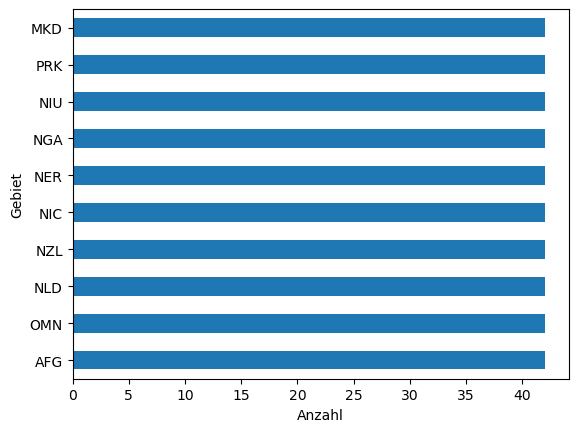

In [69]:
df["Gebiet"].value_counts().head(10).plot(kind="barh" , xlabel="Anzahl")

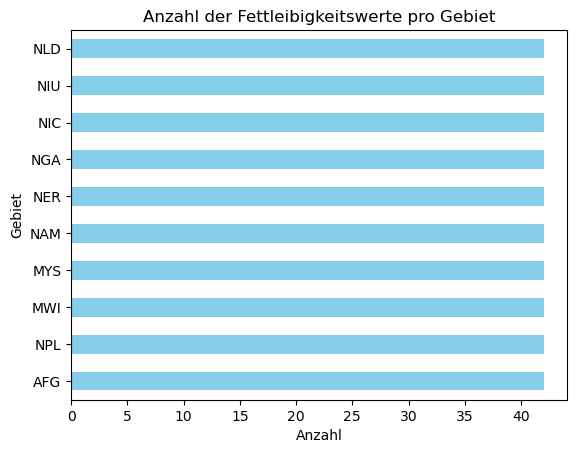

In [63]:
# Gruppiere nach 'Gebiet' und zähle die Häufigkeit
gebiet_counts = df.groupby('Gebiet')['Fettleibigkeit'].count()

# Sortiere nach der Anzahl und wähle die Top 10
gebiet_counts = gebiet_counts.sort_values(ascending=False).head(10)

# Erstelle ein Balkendiagramm
gebiet_counts.plot(kind="barh", xlabel="Anzahl", ylabel="Gebiet", title="Anzahl der Fettleibigkeitswerte pro Gebiet", color='skyblue')

# Optional: Diagramm anzeigen
import matplotlib.pyplot as plt
plt.show()


<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

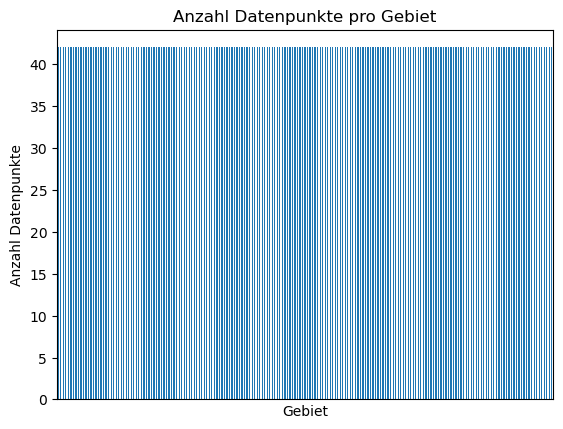

In [8]:
df["Gebiet"].value_counts().plot(kind="bar",
                                 xticks=[],     # disable labels on x-axis
                                 ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Gebiet")

### 3.2 Analyse Codes

In [9]:
print("Anzahl verschiedener Codes:", len(df["Code"].unique()))

Anzahl verschiedener Codes: 191


In [10]:
# Anzahl Datenpunkte pro Gebiet
df["Code"].value_counts()

Code
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

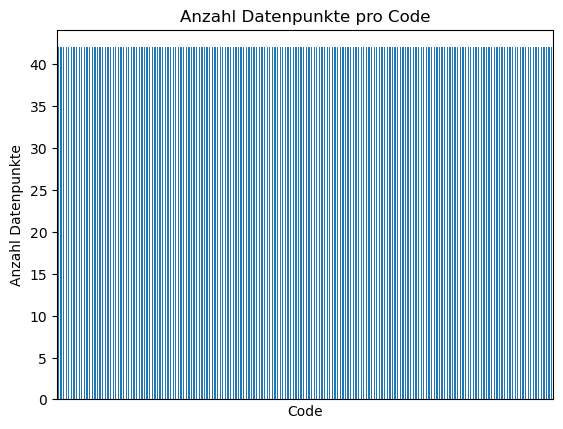

In [11]:
df["Code"].value_counts().plot(kind="bar", xticks=[], ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Code");

### 3.3 Analyse Jahr

In [12]:
print("Anzahl verschiedener Jahre:", len(df["Jahr"].unique()))

Anzahl verschiedener Jahre: 42


In [13]:
# Anzahl Datenpunkte pro Jahr
df["Jahr"].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
1980    197
1981    197
1982    197
1983    197
1984    197
1985    197
1986    197
1987    197
1988    197
1989    197
1990    197
1991    197
1992    197
1993    197
1994    197
1995    197
1996    197
1997    197
1998    197
1999    197
2000    197
2001    197
2002    197
2003    197
2004    197
2005    197
2006    197
2007    197
2008    197
2009    197
2010    197
2011    197
2012    197
2013    197
2014    197
2015    197
2016    197
Name: count, dtype: int64

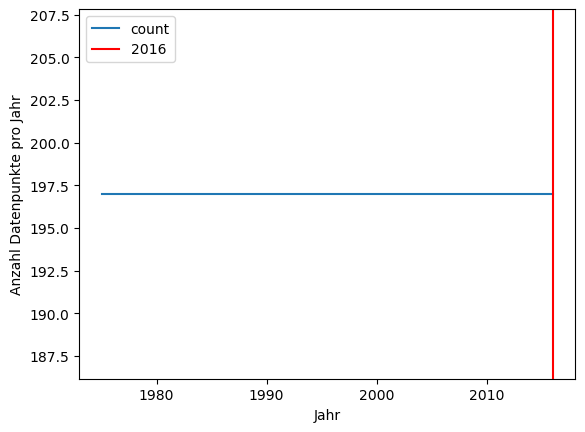

In [15]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df["Jahr"].value_counts().sort_index().plot(ylabel="Anzahl Datenpunkte pro Jahr");
g.axvline(x=2016, color="red", label="2016") # rote Linie bei 2016 - ab sind alle Jahre enthalten
g.legend()  # Legende anzeigen

In [66]:
df.describe()

,Jahr,Fettleibigkeit
count,8274.000000,8274.000000
mean,1995.500000,11.866594
std,12.121651,9.696335
min,1975.000000,0.100000
25%,1985.000000,3.900000
50%,1995.500000,10.100000
75%,2006.000000,17.700000
max,2016.000000,60.700000


### 3.4 Analyse Fettleibigkeit

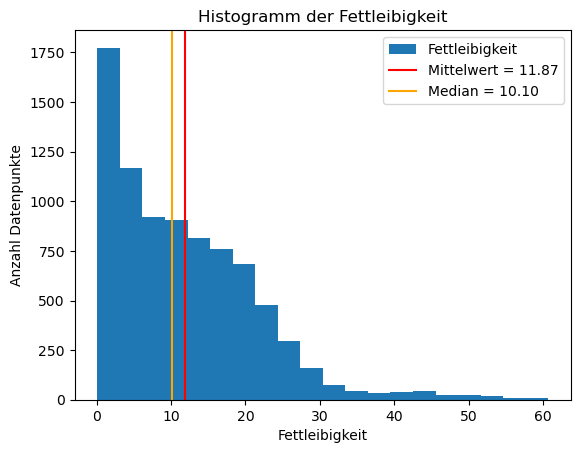

In [61]:
g = df['Fettleibigkeit'].plot(kind='hist', bins=20, title='Histogramm der Fettleibigkeit', 
                           xlabel='Fettleibigkeit', ylabel='Anzahl Datenpunkte')
mean = df['Fettleibigkeit'].mean()
g.axvline(x=df['Fettleibigkeit'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Fettleibigkeit'].median()
g.axvline(x=df['Fettleibigkeit'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

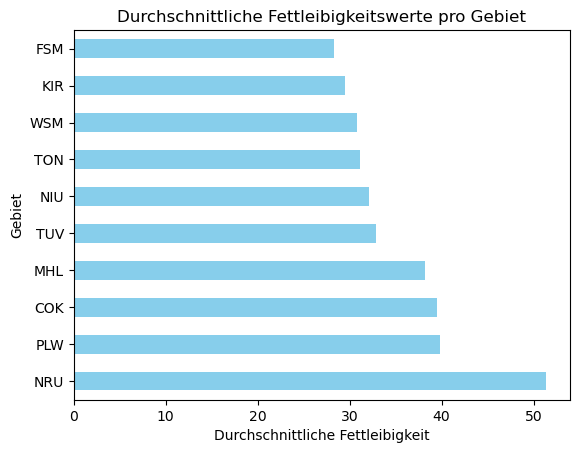

In [70]:
gebiet_avg = df.groupby('Gebiet')['Fettleibigkeit'].mean()
gebiet_avg = gebiet_avg.sort_values(ascending=False).head(10)
gebiet_avg.plot(kind="barh", xlabel="Durchschnittliche Fettleibigkeit", ylabel="Gebiet", title="Durchschnittliche Fettleibigkeitswerte pro Gebiet", color='skyblue')
plt.show()

In [71]:
print(df.groupby('Gebiet')['Fettleibigkeit'].describe())

        count       mean       std   min     25%    50%     75%   max
Gebiet                                                               
AFG      42.0   1.795238  1.209304   0.4   0.800   1.45   2.575   4.5
AGO      42.0   2.811905  1.809083   0.7   1.225   2.30   4.050   6.8
ALB      42.0  12.016667  5.177857   5.7   7.475  10.80  16.050  22.3
AND      42.0  21.390476  4.115278  13.4  18.400  21.65  24.725  28.0
ARE      42.0  18.226190  5.046277  10.8  14.425  17.85  21.675  29.9
...       ...        ...       ...   ...     ...    ...     ...   ...
WSM      42.0  30.769048  8.874642  17.6  22.750  30.20  38.725  45.5
YEM      42.0   6.788095  3.377559   2.5   3.850   6.20   9.125  14.1
ZAF      42.0  16.364286  5.682400   8.7  11.200  15.55  20.975  27.0
ZMB      42.0   3.252381  1.408032   1.3   2.225   2.95   4.050   6.5
ZWE      42.0   7.250000  2.824393   3.0   4.650   7.20   9.625  12.3

[190 rows x 8 columns]


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [120]:
diffs = df_pivot[2016]-df_pivot[1975]   # Differenz zwischen 1975 und 2016
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
VNM     2.0
TLS     2.7
BGD     3.2
ETH     3.2
KHM     3.3
       ... 
PLW    29.8
COK    30.2
KIR    31.7
NIU    32.6
TUV    35.3
Length: 190, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Fettleibigkeit 1975-2016'}, ylabel='Gebiet'>

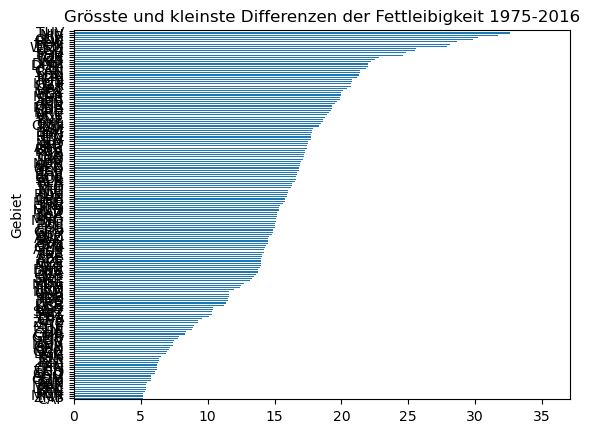

In [121]:
diff_sel = (diffs < -4) | (diffs > 5)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Fettleibigkeit 1975-2016')

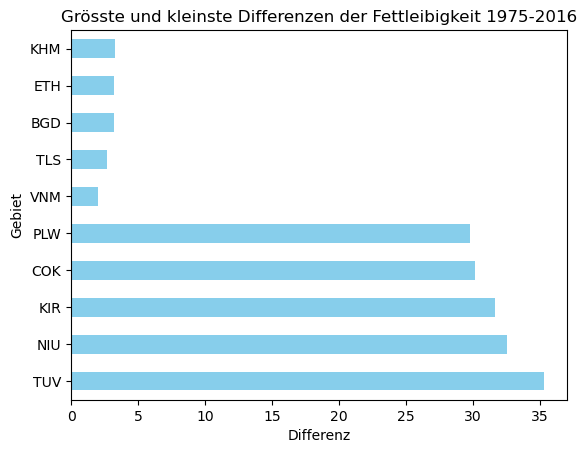

In [122]:
# Top 5 größte und kleinste Werte auswählen
top_diffs = diffs.nlargest(5)  # Größte 5 Werte
bottom_diffs = diffs.nsmallest(5)  # Kleinste 5 Werte

# Werte kombinieren
selected_diffs = pd.concat([top_diffs, bottom_diffs])

# Plot erstellen
selected_diffs.plot(kind='barh', title='Grösste und kleinste Differenzen der Fettleibigkeit 1975-2016', color='skyblue')

# Achsentitel anpassen
plt.xlabel('Differenz')
plt.ylabel('Gebiet')

# Diagramm anzeigen
plt.show()


In [111]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['CAF', 'ZMB', 'MMR', 'KEN', 'BTN', 'PHL', 'MOZ', 'PRK', 'GIN', 'COM', 'SOM', 'AGO', 'GNQ', 'TGO', 'CHN', 'SEN', 'MLI', 'TZA', 'SLE', 'IDN', 'PAK', 'NGA', 'COG', 'BEN', 'GNB', 'MDV', 'LBR', 'CIV', 'GMB', 'CMR', 'GHA', 'DJI', 'TJK', 'MUS', 'STP', 'ZWE', 'CPV', 'THA', 'EST', 'MRT', 'SWZ', 'LSO', 'KGZ', 'UZB', 'SYC', 'RUS', 'YEM', 'LVA', 'GAB', 'NAM', 'BRN', 'TKM', 'MDA', 'BEL', 'UKR', 'SWE', 'PER', 'ITA', 'DNK', 'BWA', 'BIH', 'MYS', 'CZE', 'ATG', 'AZE', 'FRA', 'AUT', 'ISR', 'ARM', 'GTM', 'SVK', 'BOL', 'SVN', 'AND', 'BLZ', 'GUY', 'GRD', 'ECU', 'ISL', 'POL', 'LTU', 'MNG', 'PNG', 'LCA', 'KAZ', 'MKD', 'HUN', 'PRY', 'SRB', 'HND', 'DEU', 'CHE', 'LUX', 'ROU', 'NIC', 'MLT', 'TTO', 'SLB', 'BLR', 'ALB', 'COL', 'BGR', 'BHR', 'ESP', 'GEO', 'VEN', 'GRC', 'NOR', 'URY', 'IRQ', 'CYP', 'PAN', 'KNA', 'BRB', 'ARG', 'PRT', 'NLD', 'SLV', 'HTI', 'HRV', 'FIN', 'BRA', 'JAM', 'ZAF', 'OMN', 'CHL', 'SYR', 'VUT', 'VCT', 'ARE', 'NRU', 'CUB', 'MNE', 'GBR', 'IRN', 'AUS', 'SUR', 'MAR', 'EGY', 'MEX', 'IRL', 'QAT', 'DZA'

In [124]:
Top_10_Gebiete = diffs[diff_sel].nlargest(10).index.tolist()
print(Top_10_Gebiete)


['TUV', 'NIU', 'KIR', 'COK', 'PLW', 'MHL', 'TON', 'WSM', 'USA', 'SAU']


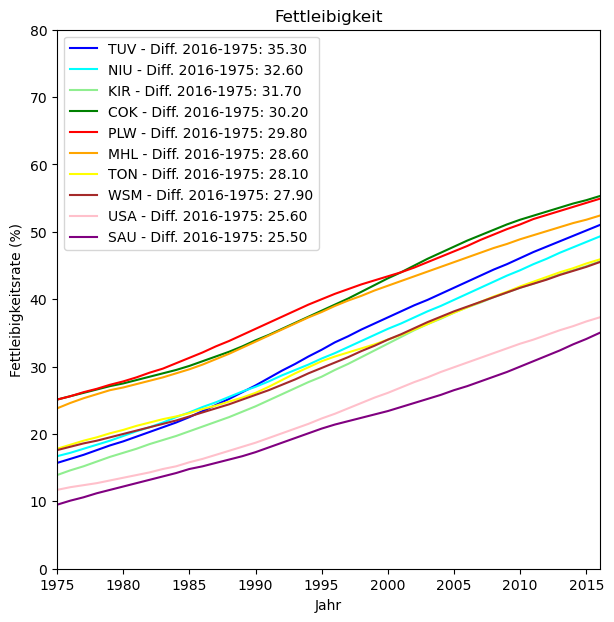

In [131]:
# Automatisch Farben zuweisen, falls sie im color_dict fehlen
for gebiet in Top_10_Gebiete:
    if gebiet not in color_dict:
        color_dict[gebiet] = 'gray'  # Standardfarbe für nicht definierte Gebiete

# Plot für jedes Gebiet in Top_10_Gebiete
for gebiet in Top_10_Gebiete:
    diff = diffs[gebiet]  # Differenz für das Gebiet
    g = df_pivot.loc[gebiet].plot(
        title='Fettleibigkeit',  # Titel des Plots
        xlabel='Jahr',  # x-Achse
        ylabel='Fettleibigkeitsrate (%)',  # y-Achse
        legend=True,  # Legende aktivieren
        label=f'{gebiet} - Diff. 2016-1975: {diff:.2f}',  # Beschriftung der Legende
        xlim=[1975, 2016],  # Angepasster Zeitraum
        ylim=[0, 80],  # Bereich für die Fettleibigkeitsrate
        color=color_dict[gebiet],  # Farbe aus dem Dictionary
        figsize=(7, 7)  # Größe des Plots
    )


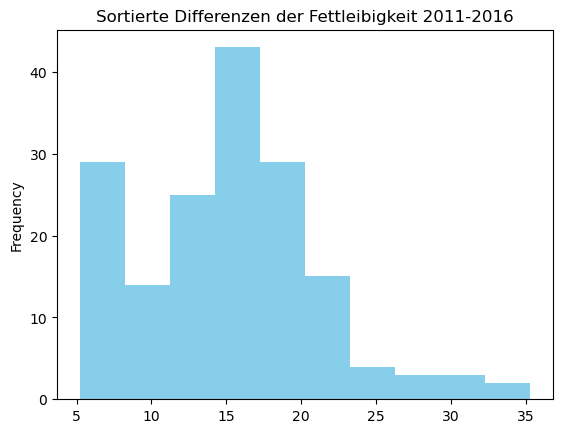

In [92]:
# Auswahl der größten und kleinsten Differenzen
diff_sel = (diffs < -4) | (diffs > 5)

# Sortiere die ausgewählten Werte
sorted_diffs = diffs[diff_sel].sort_values()

# Plot erstellen
sorted_diffs.plot(kind='hist', title='Sortierte Differenzen der Fettleibigkeit 2011-2016', color='skyblue')

# Diagramm anzeigen
plt.show()


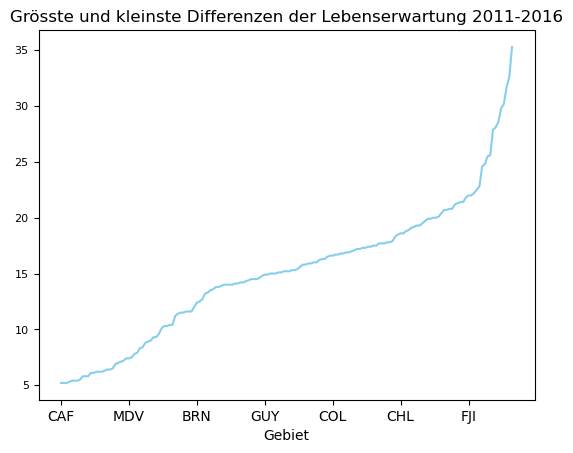

In [91]:
# Auswahl der größten und kleinsten Differenzen
diff_sel = (diffs < -4) | (diffs > 5)

# Plot erstellen
diffs[diff_sel].plot(kind='line', title='Grösste und kleinste Differenzen der Lebenserwartung 2011-2016', color='skyblue')

# Achsentext anpassen
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

# Diagramm anzeigen
plt.show()


In [72]:
print(df.head())  # Zeigt die ersten Zeilen des DataFrames
print(df.columns)  # Zeigt alle Spaltennamen


            Gebiet  Jahr  Fettleibigkeit
Afghanistan    AFG  1975             0.4
Afghanistan    AFG  1976             0.4
Afghanistan    AFG  1977             0.5
Afghanistan    AFG  1978             0.5
Afghanistan    AFG  1979             0.5
Index(['Gebiet', 'Jahr', 'Fettleibigkeit'], dtype='object')


In [74]:
# Durchschnittlicher prozentualer Anteil
global_avg = df['Fettleibigkeit'].mean()
print(f"Der globale durchschnittliche Anteil der Erwachsenen mit einem BMI ≥ 30 beträgt {global_avg:.2f}%.")


Der globale durchschnittliche Anteil der Erwachsenen mit einem BMI ≥ 30 beträgt 11.87%.


In [75]:
# Durchschnitt pro Jahr
avg_per_year = df.groupby('Jahr')['Fettleibigkeit'].mean()
print(avg_per_year)

# Durchschnitt pro Region (Gebiet)
avg_per_region = df.groupby('Gebiet')['Fettleibigkeit'].mean()
print(avg_per_region)


Jahr
1975     6.027411
1976     6.221827
1977     6.417259
1978     6.619289
1979     6.831980
1980     7.044162
1981     7.271066
1982     7.503553
1983     7.743147
1984     7.995431
1985     8.251777
1986     8.520812
1987     8.800000
1988     9.078680
1989     9.368020
1990     9.676650
1991     9.983249
1992    10.293401
1993    10.608629
1994    10.925888
1995    11.246701
1996    11.581218
1997    11.913198
1998    12.256345
1999    12.606091
2000    12.952284
2001    13.301523
2002    13.660914
2003    14.028426
2004    14.406091
2005    14.779695
2006    15.160914
2007    15.556853
2008    15.965990
2009    16.377157
2010    16.812183
2011    17.252284
2012    17.706091
2013    18.171066
2014    18.653807
2015    19.160406
2016    19.665482
Name: Fettleibigkeit, dtype: float64
Gebiet
AFG     1.795238
AGO     2.811905
ALB    12.016667
AND    21.390476
ARE    18.226190
         ...    
WSM    30.769048
YEM     6.788095
ZAF    16.364286
ZMB     3.252381
ZWE     7.250000
Name: Fe

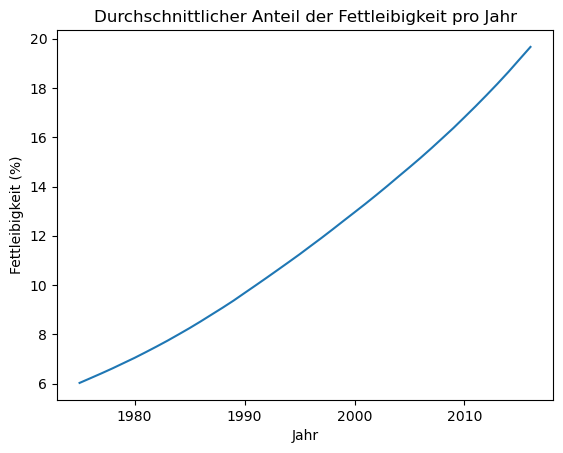

In [76]:
avg_per_year.plot(kind='line', title='Durchschnittlicher Anteil der Fettleibigkeit pro Jahr', xlabel='Jahr', ylabel='Fettleibigkeit (%)')
plt.show()


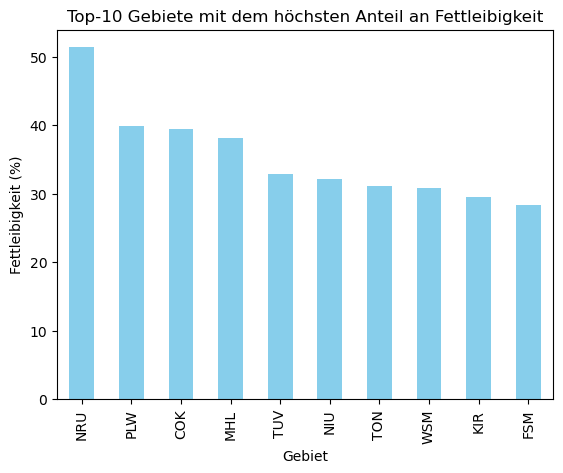

In [77]:
top10_regions = avg_per_region.sort_values(ascending=False).head(10)
top10_regions.plot(kind='bar', title='Top-10 Gebiete mit dem höchsten Anteil an Fettleibigkeit', xlabel='Gebiet', ylabel='Fettleibigkeit (%)', color='skyblue')
plt.show()
